For models which are based on a fixed nonlinear feature space mapping $\phi(x)$, the kernel function is given by the relation
\begin{equation}
k(x,x')=\phi (x)^{T}\phi (x')
\end{equation}
The kernel is a symmetric function of its arguments so that $k(x, x') = k(x', x)$. 

关于symmetric: 在核方法中，核函数被用于计算两个数据点之间的相似性或内积。由于内积的计算顺序不影响最终结果，因此核函数需要满足对称性质。这确保了核方法的正确性。


### 核方法，核函数
1. 核方法：通过核函数把数据送到另一个空间（通常具有高的维度）; 在新的空间找到一个线性关系（可以将数据分开）。[1]

2. 核函数：把数据送到另一个空间的函数[1]; 将原始空间中的向量作为输入向量，并返回特征空间（转换后的数据空间,可能是高维）中向量的点积的函数称为核函数。[2]

3. 应用：支持向量机（SVM）; 神经网络...

4. 核函数包括线性核函数、多项式核函数、高斯核函数等，其中高斯核函数最常用，可以将数据映射到无穷维，也叫做径向基函数（Radial Basis Function 简称 RBF），是某种沿径向对称的标量函数。 [3]

The simplest example: the identity mapping for the feature space
\begin{equation}
\phi (x) = x
\end{equation}
which $k(x,x') = (x^{T}x')$. Refer to this as the linear kernel.

关于linear kernel: 当$𝜙(𝑥)=𝑥$时，意味着特征空间的映射是恒等映射，即将样本直接映射到原始空间中。在这种情况下，$𝑘(𝑥,𝑥′)$可以简化为$𝑥^{𝑇}𝑥′$，这是两个数据点在原始空间中的内积，也被称为线性核。线性核计算的是数据点在原始空间中的内积，即线性关系的度量。它无法捕捉高维的、非线性的特征之间的相互作用。与之相反，非线性核可以通过引入非线性的特征映射函数𝜙(𝑥)来捕捉更丰富的特征关系。



# 6.1 Dual representations 

### 什么是对偶问题

对偶问题：

1. 对偶问题是原始优化问题的另一种表述方式。在对偶问题中，优化的目标函数和约束条件都与原始问题不同，但两个问题具有等价的最优解。通过解决对偶问题，可以间接地得到原始问题的最优解，这种方法称为对偶法。[4] 

2. 任何一个求极大化的线性规划问题都有一个求极小化的线性规划问题与之对应，反之亦然，如果我们把其中一个叫原问题，则另一个就叫做它的对偶问题，并称这一对互相联系的两个问题为一对对偶问题。[5] 

3. 点动成线，线动成点，“点”和“线”的关系总结为对偶。[6]

判定一个问题是否对偶问题通常需要分析问题的具体形式和性质，并考虑问题是否满足对偶性的条件。强对偶性（Strong Duality）是最优化理论中的一个重要概念，在线性规划和凸优化等领域中被广泛应用。它指的是在满足一定条件下，原始问题和对偶问题具有相同的最优解。可以通过对偶问题的解来获得原始问题的一些额外信息，比如最优解的界限等。

### 公式部分
Condition: 1. linear models for regression and classification; 2. the kernel function arises naturally.

Consider a linear regression model whose parameters are determined by minimizing a regularized sum-of-squares error function: 
\begin{equation}
J(w) = \frac{1}{2}\sum_{n=1}^{N} \{w^{T}\phi(x_{N})-t_{n}\}^{2} + \frac{\lambda}{2}w^{T}w
\end{equation}

which $\lambda \ge  0$.

$𝐉(𝑤)$：误差函数，表示模型的预测值与真实值之间的差异。

$\sum$部分：模型对每个训练样本的预测与真实值之间的差异的平方和。

$\frac{\lambda}{2}w^{T}w$: 正则化项，用于控制模型的复杂度。

$w^{T}\phi(x_{N})$: 模型对输入$𝑥_{𝑁}$的预测值。$𝑤$是模型的参数向量，$𝜙(𝑥_{𝑁})$是将输入$𝑥_{𝑁}$映射到特征空间后得到的特征向量。这里的$𝑤_{𝑇}𝜙(𝑥_{𝑁})$可以理解为训练结果的一部分，它是模型利用参数$𝑤$对输入$𝑥_{𝑁}$的预测值。

If we set the gradient of $J(w)$ with respect to w equal to zero, we see that the solution for $w$ takes the form of a linear combination of the vectors $\phi(x_{n})$, with coefficients that are functions of $w$:
\begin{equation}
w=-\frac{1}{\lambda}\sum_{n=1}^{N}\{w^{T}\phi(x_{n})-t_{n}\}\phi(x_{n})=\sum_{n=1}^{N}a_{n}\phi(x_{n})=\Phi ^{T}a
\end{equation}
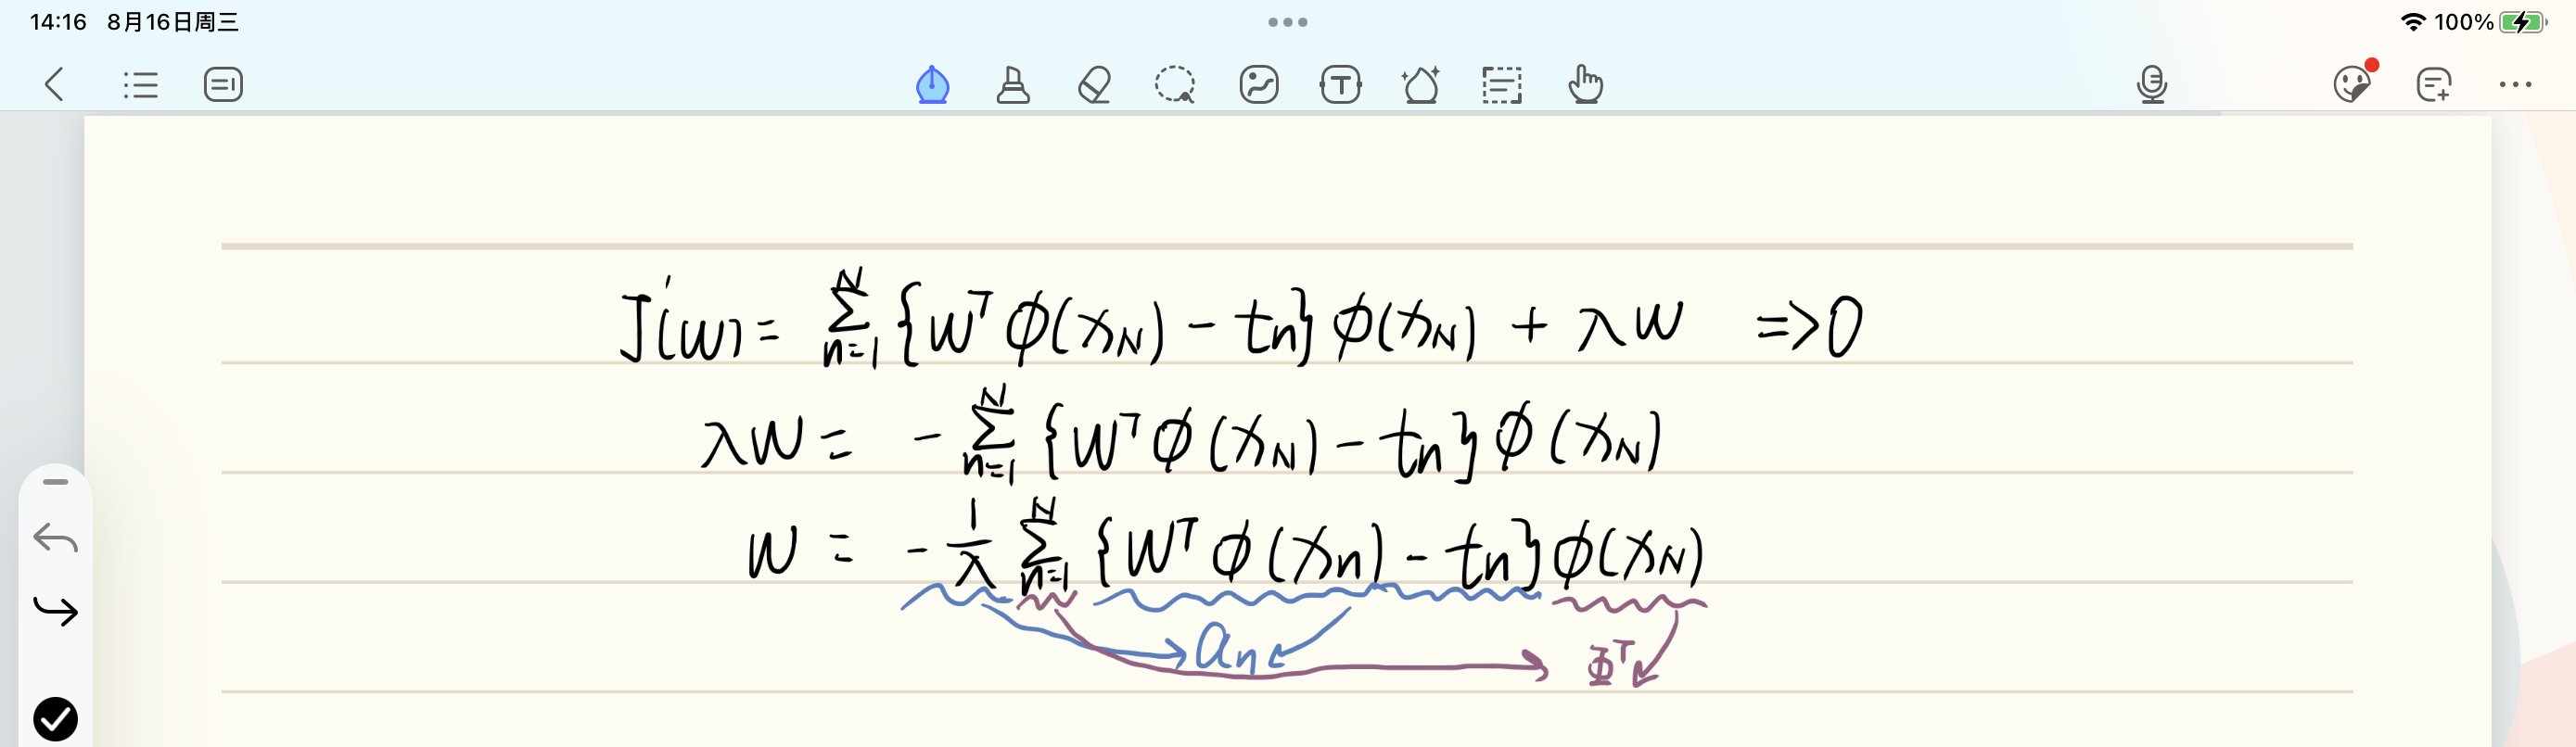
where $\Phi$ is the design matrix, whose $n^{th}$ row is given by $\phi(x_{n})^{T}$.

$\Phi$: 对于给定的数据点 $𝑥_{𝑛}$ ，$𝜙(𝑥_{𝑛})$ 是将 $𝑥_{𝑛}$ 进行特征映射后得到的向量。这意味着每个输入数据点都会通过 $Φ$ 映射到特征空间中的一个向量。

Define: 
\begin{equation}
a=(a_{1},...,a_{N})^{T}
\end{equation}
\begin{equation}
a_{n}= -\frac{1}{\lambda}\{w^{T}\phi(x_{n})-t_{n}\}
\end{equation}
$a_{n}$: 是一个系数，用于表示特征空间中每个数据点的权重或重要性。通过对 $𝑎_{𝑛}$ 进行适当的选择和调整，可以学习到合适的模型参数


Instead of working with the parameter vector $w$, we can now reformulate the least- squares algorithm in terms of the parameter vector $a$, giving rise to a dual represen- tation. If we substitute $w = \Phi^{T}a$ into $J(w)$, we obtain
\begin{equation}
J(a)=\frac{1}{2}a^{T}\Phi\Phi^{T}\Phi\Phi^{T}a-a\Phi\Phi^{T}t+\frac{1}{2}t^{T}t+\frac{\lambda}{2}a^{T}\Phi\Phi^{T}a
\end{equation}
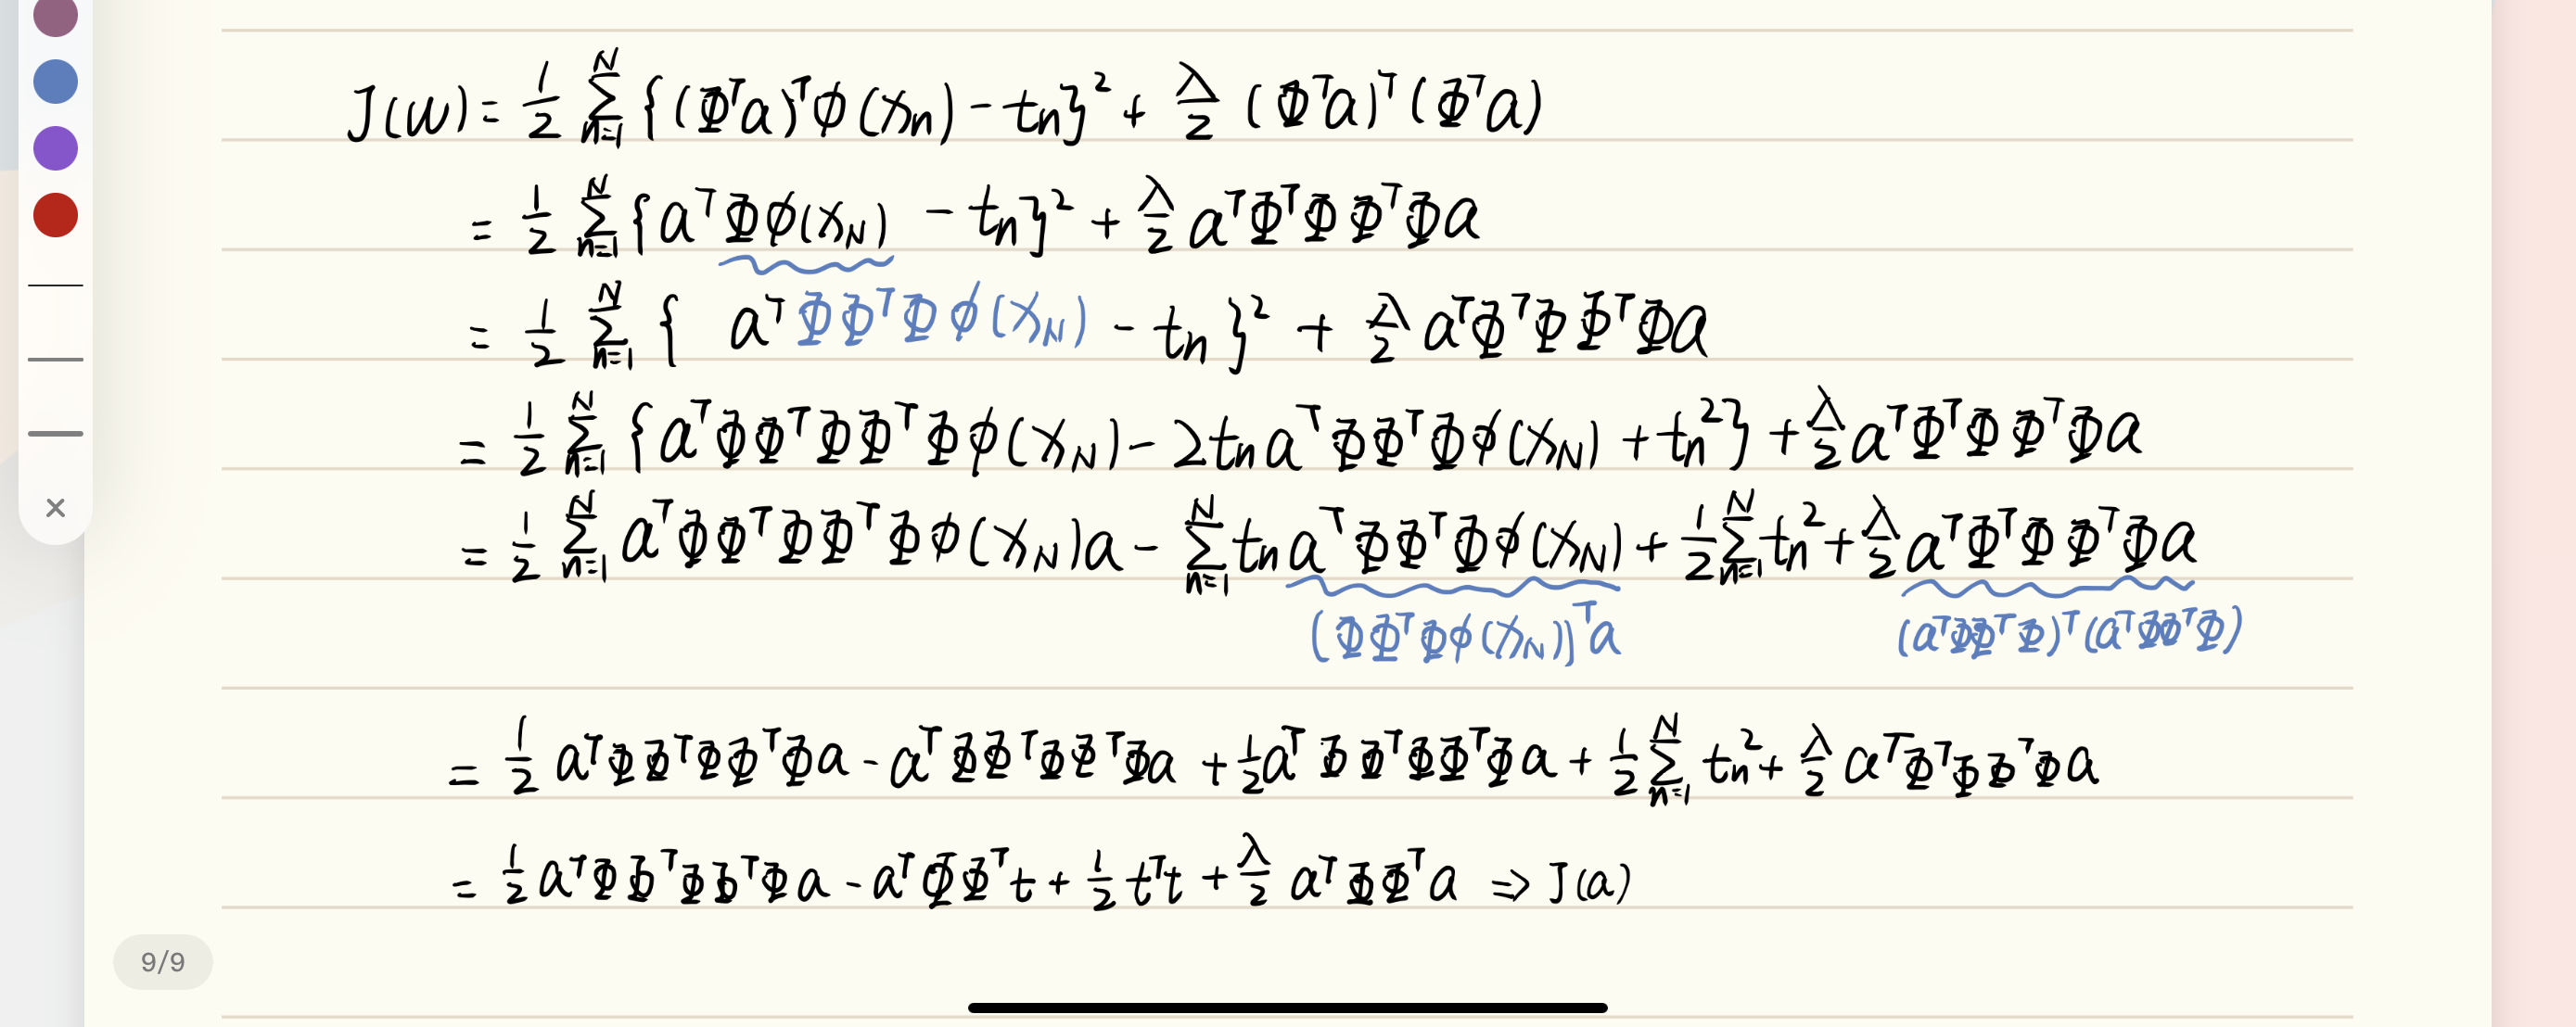
where $t= (t_{1},...,t_{N})^{T}$.



Define $Gram$ Matrix $K=\Phi\Phi^{T}$, which is an $N × N$ symmetric matrix with elements:
\begin{equation}
K_{nm}=\phi(x_{n})^{T}\phi(x_{m})=k(x_{n},x_{m})
\end{equation}
Gram Matrix: 也称为格拉姆矩阵，是线性代数中的一个概念。给定一个向量空间中的一组向量 $\{𝑣₁, 𝑣₂, ..., 𝑣ₙ\}$，Gram矩阵 $𝐺$ 是由这组向量的内积计算得到的。Gram矩阵的元素 $𝐺_{𝑖𝑗}$ 是向量 $𝑣_{𝑖}$ 和向量 $𝑣_{𝑗}$ 的内积的结果。  
\begin{equation}
G=\begin{bmatrix}
 g_{11} & g_{12} & \dots  &g_{1j} \\
 g_{21} & g_{22} & \dots  & g_{2j}\\
 \dots  & \dots  & \dots  & \dots \\
 g_{i1} & g_{i2} & \dots  &g_{ij}
\end{bmatrix}
\end{equation}



The sum-of-squares error function can be written as
\begin{equation}
J(a)=\frac{1}{2}a^{T}KKa-a^{T}Kt+\frac{1}{2} t^{T}t+\frac{\lambda}{2}a^{T}Ka
\end{equation}
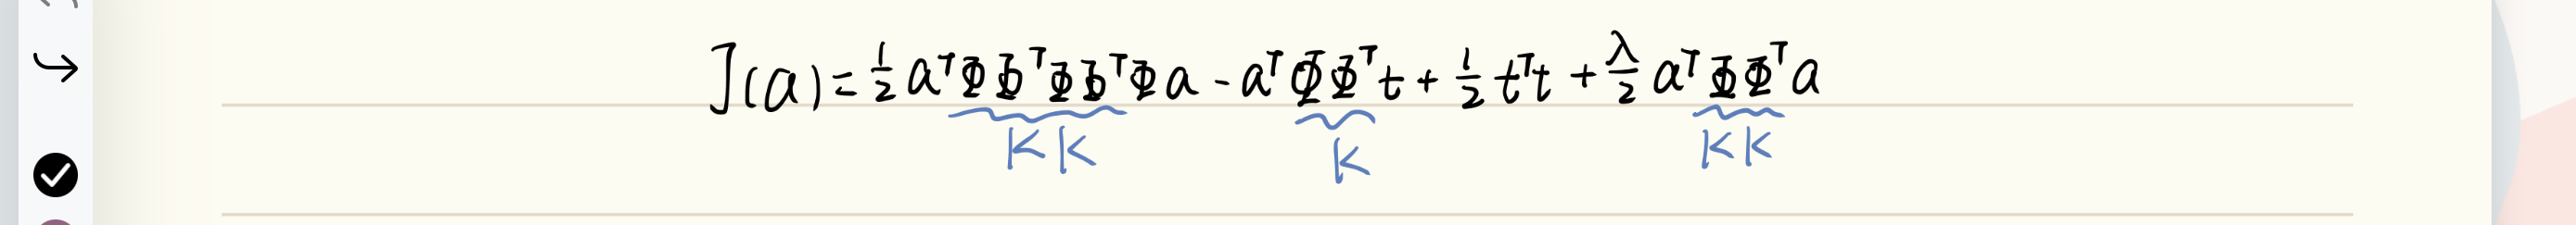


Setting the gradient of $J(a)$ with respect to a to zero, we obtain the following solution
\begin{equation}
a=(K+\lambda I_{N})^{-1}t
\end{equation}
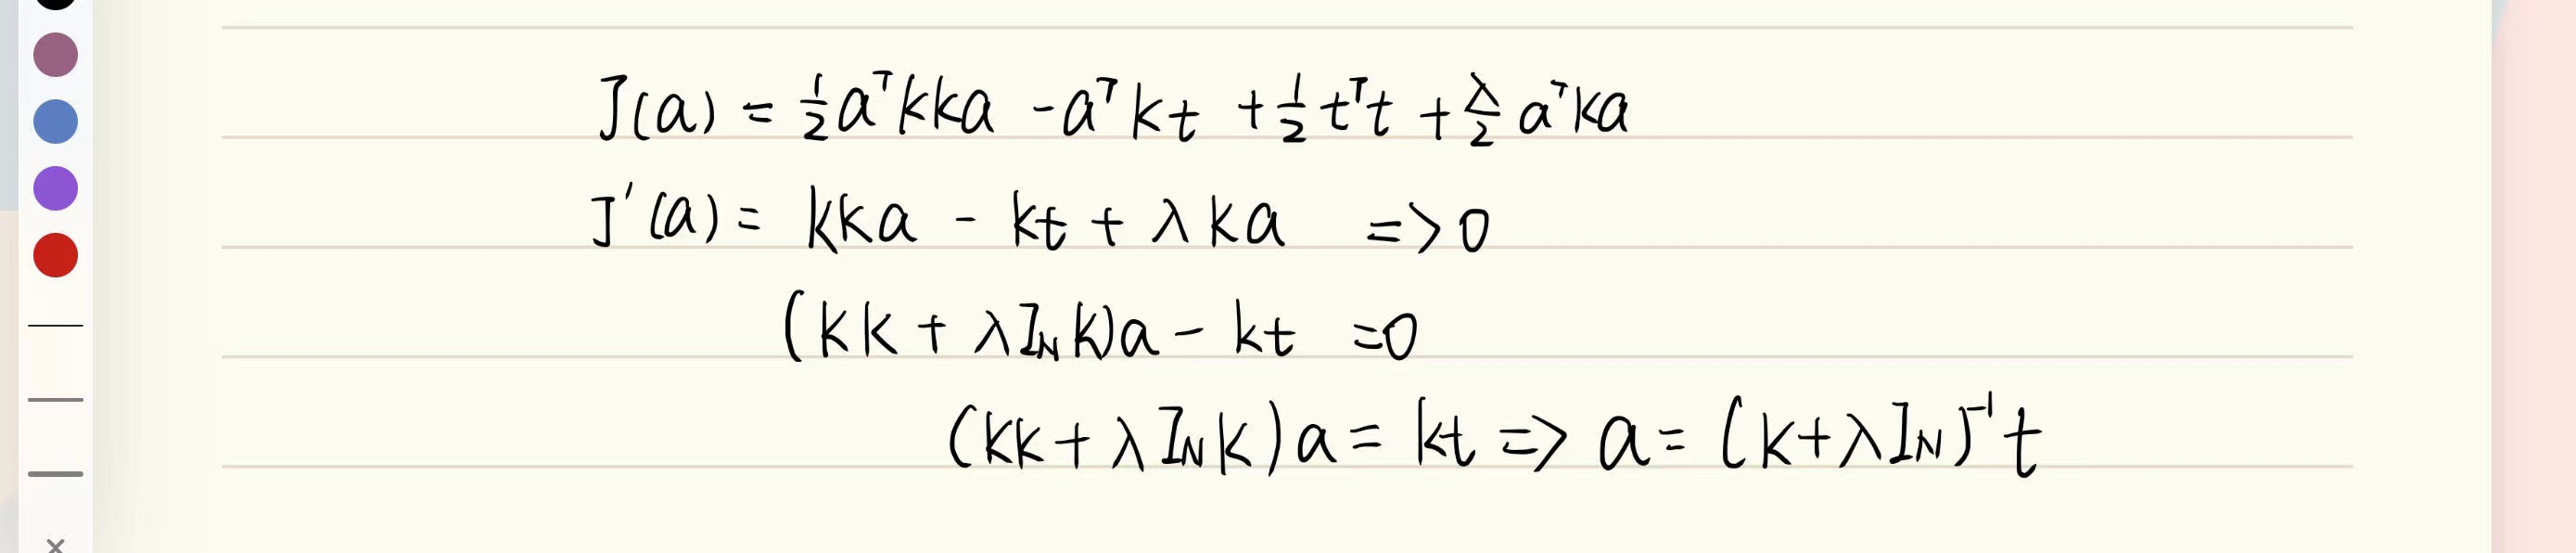
If we substitute this back into the linear regression model, we obtain the following prediction for a new input $x$
\begin{equation}
y(x)=w^{T}\phi(x)=a^{T}\Phi\phi(x)=k(x)^{T}(K+\lambda I_{N})^{-1}t
\end{equation}
where we have defined the vector $k(x)$ with elements $k_{n}(x) = k(x_{n}, x)$. 


# 6.2 Constructing Kernels

### 1. How to construct a kernel
1. Choose a feature space mapping φ(x) and then use this to find the corresponding kernel

The kernel function is defined for a one-dimensional input space by
\begin{equation}
k(x,x')=\phi(x)^{T}\phi(x')=\sum_{i=1}^{N}\phi_{i}(x)\phi_{i}(x')
\end{equation}
where $\phi_{i}(x)$ are the basis functions.

2. Construct kernel functions directly

Requirement: ensure that the function we choose is a valid kernel

It corresponds to a scalar product in some (perhaps infinite dimensional) feature space. 
\begin{equation}
k(x,z)=(x^{T}z)^{2}
\end{equation}
Take the particular case of a two-dimensional input space $x = (x1,x2)$, expand for nonlinear feature mapping: 

\begin{equation}
k(x,z)=(x^{T}z)^{2}=(x_{1}z_{1}+x_{2}z_{2})^{2}\\
=x_{1}^{2}z_{1}^{2}+2x_{1}z_{1}x_{2}z_{2}+x_{2}^{2}z_{2}^{2}\\
=(x_{1}^{2},\sqrt{2} x_{1}x_{2},x_{2}^{2})(z_{1}^{2},\sqrt{2}z_{1}z_{2},z_{2}^{2})^{T}\\
=\phi(x)^{T}\phi(z)
\end{equation}

The feature mapping takes the form $\phi(x)=(x_{1}^{2},\sqrt{2} x_{1}x_{2},x_{2}^{2})^{T}$ and therefore comprises all possible second order terms, with a specific weighting between them.

### 2.  Test a valid kernel without having to construct the function $\phi(x)$ explicitly.

A necessary and sufficient condition: 

1. It should be positive semidefinite for all possible choices of the set $\{x_{n}\}$. 

2. Note that a positive semidefinite matrix is not the same thing as a matrix whose elements are nonnegative.


在核方法中，核函数必须是正定的（positive definite）的主要原因是为了保证所构造的特征空间是内积空间，以便能够在该空间中进行有效的内积计算和相似性度量。如果核函数是正定的，那么从样本集合 $X$ 中任取 $N$ 对应的核矩阵 $K$ 总是半正定的。而这两个性质同样是判定是否为正定核函数的充要条件。 [7]



### 3. Some properties of techniques for constructing new kernels.

One powerful technique for constructing new kernels is to build them out of simpler kernels as building blocks. This can be done using the following properties:

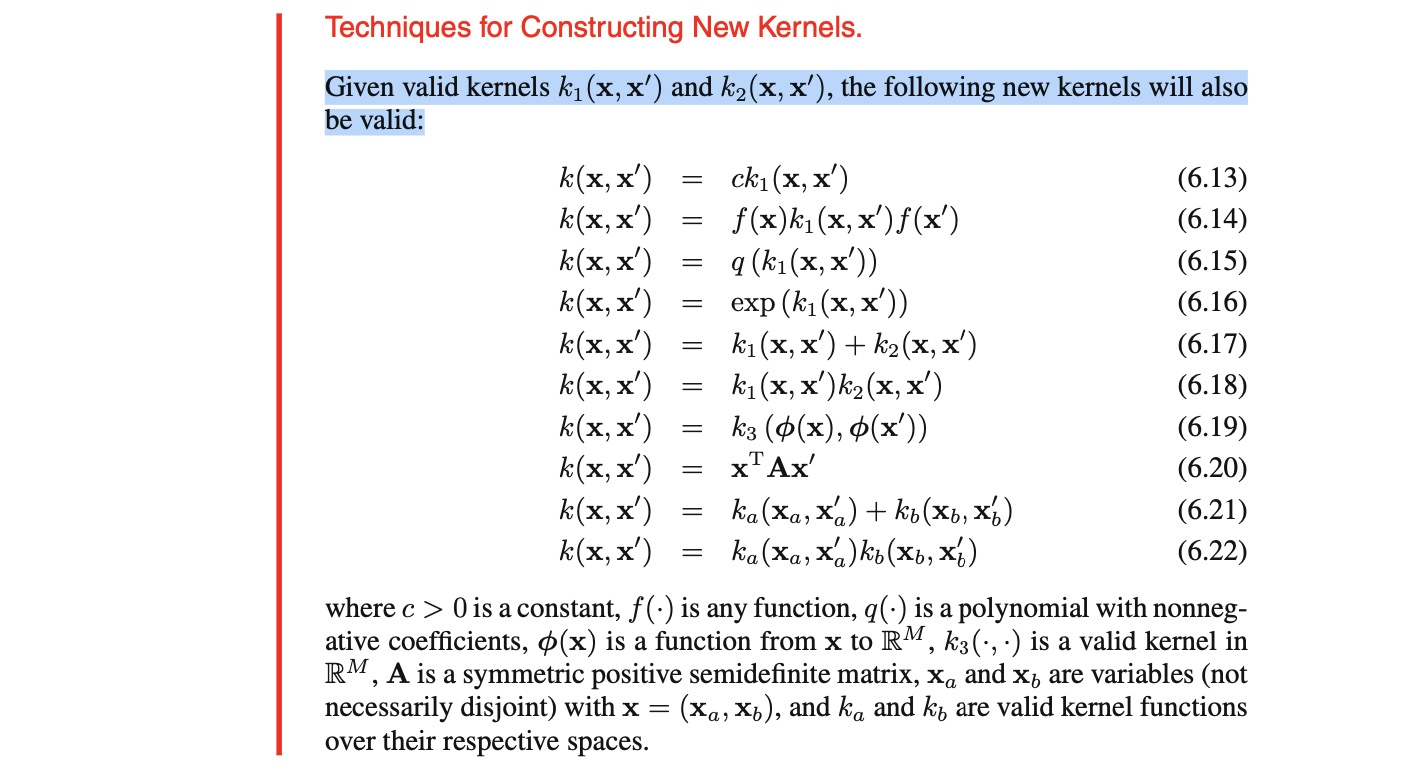
Requirement: 

The kernel $k(x, x')$ be symmetric and positive semidefinite and that it expresses the appropriate form of similarity between $x$ and $x'$ according to the intended application. 

### 4.  Some kernel form

1. combining kernels

Simple polynomial kernel
\begin{equation}
k(x,x')=(x^{T}x')^{2}
\end{equation}
only terms of degree two.

If we consider the slightly generalized kernel
\begin{equation}
k(x,x')=(x^{T}x'+c)^{2}
\end{equation}
with $c>0$, then the corresponding feature mapping $\phi(x)$ contains constant and linear terms as well as terms of order two. 相应的特征映射𝜙(𝑥) 包含常数项、线性项以及二阶项。

在核方法中，常数项c通常是为了添加偏置或偏移而引入的。它在核函数中的作用是对输入数据进行平移。通过引入常数项c，可以在特征空间中引入一个额外的维度，使得对应的超平面或决策边界可以在原始输入空间中进行平移。


Similarly,
\begin{equation}
k(x,x')=(x^{T}x')^{M}
\end{equation}
contains all monomials of order $M$.

This can similarly be generalized to include all terms up to degree M by considering
\begin{equation}
k(x,x')=(x^{T}x'+c)^{M}
\end{equation}
with $c > 0$.

Using the results (6.17) and (6.18) for combining kernels we see that these will all be valid kernel functions.

2. Another commonly used kernel takes the form (‘Gaussian’ kernel)

\begin{equation}
k(x,x')=exp(-\left \|x-x'  \right \| ^{2}/2\sigma^{2})
\end{equation}



### 5. Gaussian kernel


However, that in this context it is not interpreted as a probability density, and hence the normalization coefficient is omitted.

This is a valid kernel by expanding the square 
\begin{equation}
\left \|x-x'  \right \| ^{2}=x^{T}x+(x')^{T}x'-2x^{T}x' \\
(6.24)
\end{equation}
to give 

$$ \exp(K) = \exp(0) + \exp(0)K + \frac{\exp(0)}{2!}K^2 + \frac{\exp(0)}{3!}K^3 + ...\\ \exp(K) = 1 + K + \frac{1}{2}K^2 + \frac{1}{6}K^3+... $$

\begin{equation}
k(x,x')=exp(-x^{T}x/2\sigma^{2})exp(x^{T}x'/\sigma^{2})exp(-(x')^{T}x'/2\sigma^{2})
\end{equation}
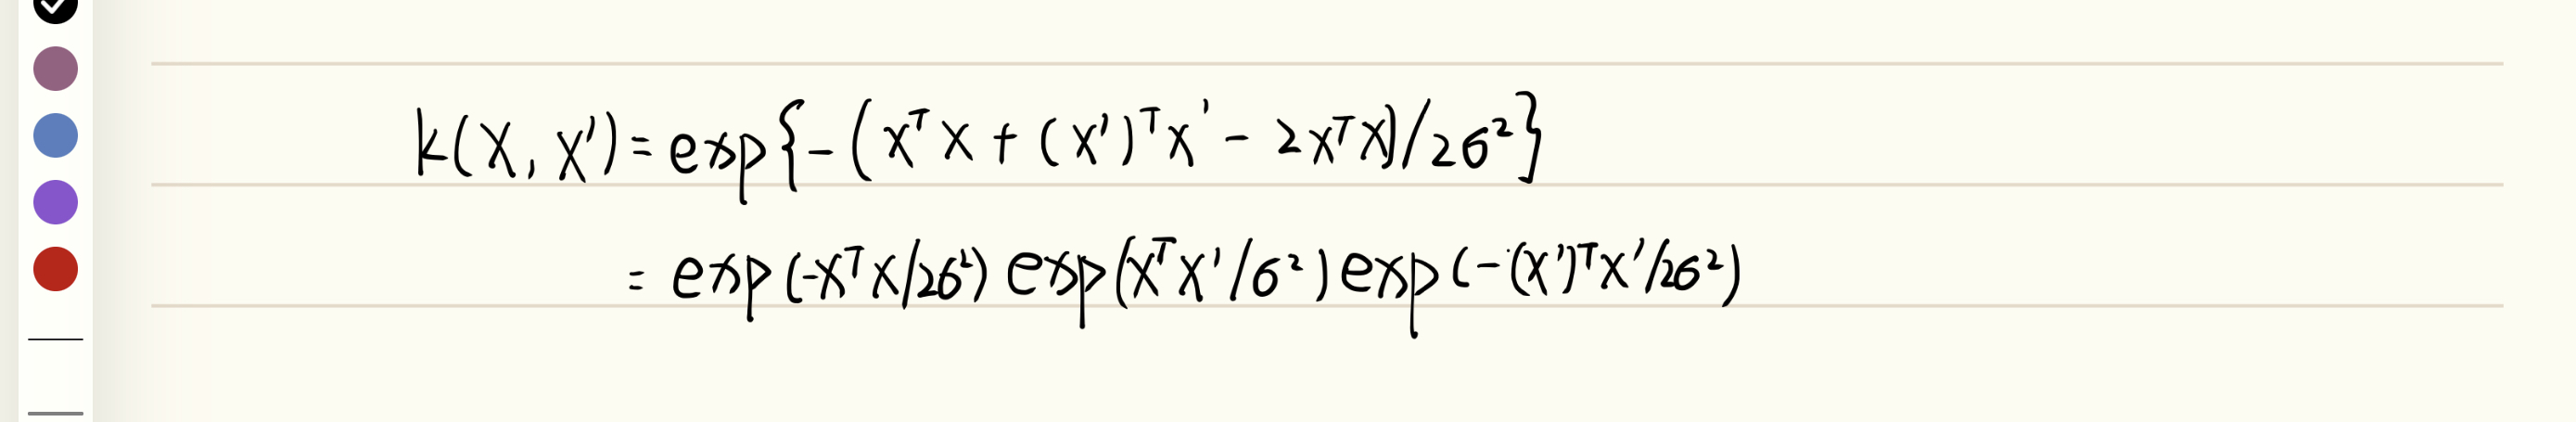
and then making use of (6.14) and (6.16), together with the validity of the linear kernel $k(x, x') = x^{T}x'$. Note that the feature vector that corresponds to the Gaussian kernel has infinite dimensionality.




The Gaussian kernel is not restricted to the use of Euclidean distance. If we use kernel substitution in (6.24) to replace $x^{T}x'$ with a nonlinear kernel $\kappa(x,x')$, we obtain
\begin{equation}
k(x,x')=exp\{-\frac{1}{2\sigma^{2}}(\kappa(x,x)+\kappa(x',x')-2\kappa(x,x'))\}
\end{equation}
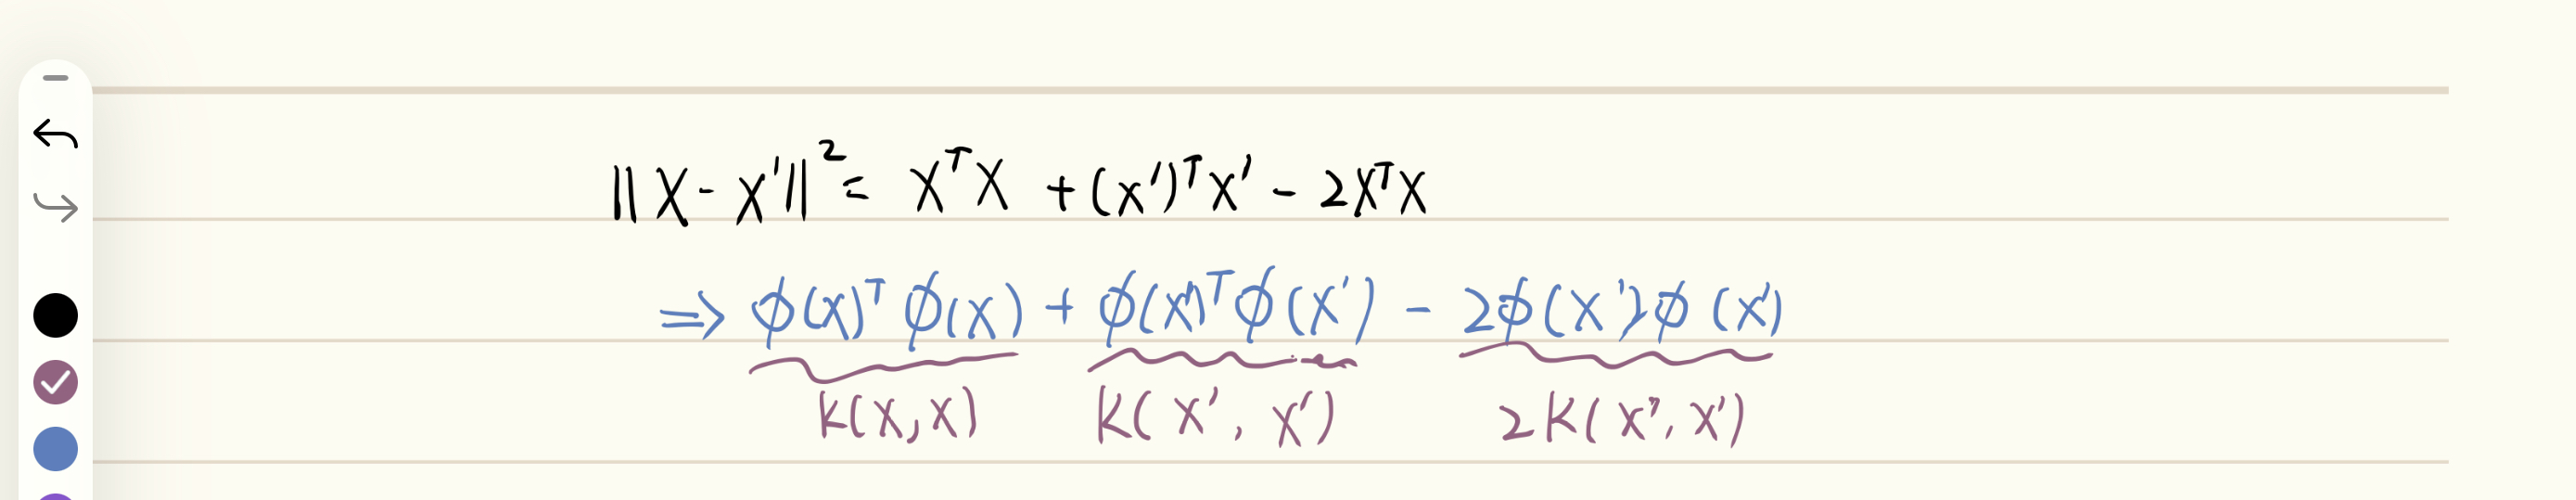

### 6. Inputs are symbolic

An important contribution to arise from the kernel viewpoint has been the exten- sion to inputs that are symbolic, rather than simply vectors of real numbers. Kernel functions can be defined over objects as diverse as graphs, sets, strings, and text documents. Consider, for instance, a fixed set and define a nonvectorial space consisting of all possible subsets of this set. 内核观点的一个重要贡献是将输入扩展为符号输入，而不仅仅是实数向量输入。核函数可以定义在图形、集合、字符串和文本文档等各种对象上。

If $A_{1}$ and $A_{2}$ are two such subsets then one simple choice of kernel would be
\begin{equation}
k(A_{1},A_{2})=2^{|A_{1}\cap A_{2}|}
\end{equation}
where $A_{1}\cap A_{2}$ denotes the intersection of sets $A_{1}$ and $A_{2}$, and $|A|$ denotes the number of subsets in $A$. 

This is a valid kernel function because it can be shown to correspond to an inner product in a feature space.

这个核函数的作用是衡量两个子集之间的相似性。它根据两个集合中共同元素的数量来衡量它们之间的相似性。两个集合的交集中有多少个元素，就将2的该数量次幂作为它们之间的相似度。

这种核函数的选择较为简单，具体取决于问题的特性和目标任务。它可用于测量集合之间的相似性，例如在文本分类中衡量两个文档的相似程度，或在推荐系统中比较用户之间的兴趣相似度等。



### 7. Construct kernels from a probabilistic generative model (生成模型)

One powerful approach to the construction of kernels starts from a probabilistic generative model (Haussler, 1999), which allows us to apply generative models in a discriminative setting. 

(1) Generative models: deal naturally with missing data and in the case of hidden Markov models can handle sequences of varying length. 可以自然地处理缺失数据，在隐马尔可夫模型的情况下，可以处理不同长度的序列。\

生成模型：单从名字角度，可以将其认识为：生成样本的模型。从流程的角度，它可以理解为：[11]

    给定一个数据集合，基于该数据集合进行建模，并通过数据集合学习出模型的参数信息；
    根据已学习出的参数信息，使用模型构建出新的数据。

(2) Discriminative models: generally give better performance on discriminative tasks than generative models. 判别模型在判别任务中的表现通常比生成模型更好。

判别模型特别用于监督机器学习。也称为条件模型，它学习数据集中类或标签之间的边界。判别模型的最终目标是将一类与另一类分开,它们无法生成新的数据点。 [12]

   a. 假设P(Y|X)的某种函数形式, 该函数的输入是X，输出是Y;
   b. 直接从训练数据估计P(Y|X)的参数[12]

Combine them is to use a generative model to define a kernel, and then use this kernel in a discriminative approach.将这两种方法结合起来的一种方法是使用生成模型定义一个核，然后在判别方法中使用这个核。

1. Technique I: 
Given a generative model $p(x)$ we can define a kernel by
\begin{equation}
k(x,x')=p(x)p(x')
\end{equation}
This is clearly a valid kernel function because we can interpret it as an inner product in the one-dimensional feature space defined by the mapping $p(x)$. It says that two inputs x and x are similar if they both have high probabilities. 

Use (6.13) and (6.17) to extend this class of kernels by considering sums over products of different probability distributions, with positive weighting coefficients $p(i)$
\begin{equation}
k(x,x')=\sum_{i}p(x|i)p(x'|i)p(i)\\(6.29)
\end{equation}
以上公式表示核函数$k(x,x')$是通过对所有的$i$求和，对每个$i$计算$p(x|i)$、$p(x'|i)$和$p(i)$的乘积，并将所有结果相加得到。

$p(x|i)$：表示给定类别i的条件下，数据$x$出现的概率。它表示了在给定类别下数据点$x$的分布情况。

$p(x'|i)$：表示给定类别i的条件下，数据$x'$出现的概率。类似地，它表示了在给定类别下数据点$x'$的分布情况。

$p(i)$：表示类别$i$的先验概率，即在整个数据集中类别i出现的概率。它表示了类别$i$在整体数据中的分布情况。




Taking the limit of an infinite sum, we can also consider kernels of the form
\begin{equation}
k(x,x')=\int p(x|z)p(x'|z)p(z)dz
\end{equation}
where $z$ is a continuous latent variable.

连续潜变量（Continuous Latent Variable）: 指的是在概率建模和机器学习中，具有连续取值的未观察到的变量。潜变量是建立在观测数据之上的概念，它代表了无法直接测量或观察到的抽象特征或状态。

Assumption: Our data consists of ordered sequences of length $\Rightarrow $ an observation is given by $X = \{x1, . . . , xL\}$

隐马尔可夫模型: 是由马尔可夫链生成随机不可观测的随机状态序列，再由各个状态生成可观测的随机序列 [8]

A popular generative model for sequences is the hidden Markov model, which expresses the distribution p(X) as a marginalization over a corresponding sequence of hidden states $Z = \{z_{1} , . . . , z_{L} \}$. We can use this approach to define a kernel function measuring the similarity of two sequences X and X by extending the mixture representation (6.29) to give
\begin{equation}
k(X,X')=\sum_{Z}p(X|Z)p(X'|Z)p(Z)
\end{equation}
so that both observed sequences are generated by the same hidden sequence $Z$. This model can easily be extended to allow sequences of differing length to be compared.


2. Technique II: 

Using generative models to define kernel functions is known as the Fisher kernel

费舍尔核（Fisher Kernel）: 是一种基于统计学习理论中费舍尔信息矩阵的表示方法，用于描述数据集的特征和概率分布之间的关系。费舍尔核主要用于特征提取和分类任务中。利用了数据的概率分布和梯度信息来计算特征表示，将概率分布的特征转化为实数向量。这样做的目的是保留了数据的统计特性，并提供了一种有效的方法来比较和分类数据。

Step 1: Consider a parametric generative model $p(x|\theta)$ where θ denotes the vector of parameters. The goal is to find a kernel that measures the similarity of two input vectors $x$ and $x'$ induced by the generative model.

Step 2: consider the gradient with respect $\theta$.

\begin{equation}
g(\theta,x)=\bigtriangledown _{\theta}lnp(x|\theta)
\end{equation}
from which the Fisher kernel is defined by
\begin{equation}
k(x,x')=g(\theta,x)^{T}F^{-1}g(\theta,x')
\end{equation}
Here F is the Fisher information matrix, given by
\begin{equation}
F=\mathbb{E} _{x}[g(\theta,x)g(\theta,x)^{T}]
\end{equation}
费舍尔信息矩阵（Fisher information matrix）表示了关于θ的二阶导数（关于θ的梯度）的期望值。

where the expectation is with respect to x under the distribution $p(x|\theta)$.

It is often infeasible to evaluate the Fisher information matrix. One approach is simply to replace the expectation in the definition of the Fisher informa- tion with the sample average, giving
\begin{equation}
F\simeq \frac{1}{N}\sum_{n=1}^{N}g(\theta,x_{n})g(\theta,x_{n})^{T}
\end{equation}

其中，$g(\theta,x_n)$ 是 Fisher 分数（Fisher scores）的向量形式，表示参数 $\theta$ 和数据点 $x_n$ 之间的关系。

This is the covariance matrix of the Fisher scores, and so the Fisher kernel corresponds to a whitening of these scores. More simply, we can just omit the Fisher information matrix altogether and use the noninvariant kernel

这个近似 Fisher 信息矩阵实际上是 Fisher 分数的协方差矩阵，因此 Fisher 核函数就是基于 Fisher 分数的白化处理的结果。白化是一种数据预处理的技术，用于使数据在特征空间中无相关性和单位方差。

也可以不使用 Fisher 信息矩阵，而直接使用非不变核函数来描述数据之间的关系。

\begin{equation}
k(x,x')=g(\theta,x)^{T}g(\theta,x')
\end{equation}

3. sigmoidal kernel

A kernel function is the sigmoidal kernel given by
\begin{equation}
k(x,x')=tanh(ax^{T}x'+b)
\end{equation}
whose Gram matrix in general is not positive semidefinite. 

正定矩阵的性质是：对于任何非零的实向量$c$，都有$c^{T}Kc \geq 0$，其中$K$是Gram矩阵。然而，对于sigmoidal核函数，Gram矩阵可能不满足这个性质。这意味着使用sigmoidal核函数构造的核矩阵在某些情况下可能无法正确定义，这反过来可能导致一些问题，例如无法收敛、模型不稳定等。





# 6.3 Radial Basis Function Networks

径向基函数: 某种沿径向对称的标量函数，通常定义为样本到数据中心之间径向距离（通常是欧氏距离）的单调函数（由于距离是径向同性的）。[10]

### 1. Radial basis functions

1. Radial basis functions: have the property that each basis function depends only on the radial distance (typically Euclidean) from a centre $\mu_{j}$. 每个基函数只取决于与中心 $μ_{j}$ 的径向距离（通常是欧氏距离）

2. Using: Historically, radial basis functions were introduced for the purpose of exact func- tion interpolation; 

给定一组输入向量 $\{x_{1}, ... , x_{N} \}$ 以及相应的目标值 $\{t_{1} , ... , t_{N}\}$，我们的目标是找到一个能精确拟合每个目标值的平滑函数 $f(x)$，从而在$n = 1, . . . , N$时 $f(x_{n}) = t_{n}$。 

实现：可将 $f(x)$ 表示为径向基函数的线性组合，以每个数据点为中心.
\begin{equation}
f(x)= \sum_{n=1}^{N}w_{n}h(||x-x_{n}||)
\end{equation}
$\{w_{n}\}$: found by least squares

基函数$h(.)$为非线性函数，训练数据点$ x_{n}$是$h$的中心。基函数以输人空间的点$x$与中心$ x_{n}$的距离作为函数的自变量。由于距离是径向同性的，故函数被称为径向基函数。[9] 

3. Motivation: a consideration of the interpolation problem when the input (rather than the target) variables are noisy.

If the noise on the input variable $x$ is described by a variable $\xi $ having a distribution $\nu (\xi )$, then the sum-of-squares error function becomes
\begin{equation}
E=\frac{1}{2}\sum_{n=1}^{N}\int \{y(x_{n}+\xi )-t_{n}\}^{2}\nu(\xi)d\xi
\end{equation}

Using the calculus of variations(变分法）, we can optimize with respect to the function f(x) to give
\begin{equation}
y(x_{n})=\sum_{n=1}^{N}t_{n}h(x-x_{n})
\end{equation}
where the basis functions are given by (6.41)
\begin{equation}
h(x-x_{n})=\frac{\nu(x-x_{n})}{\sum_{n=1}^{N}\nu(x-x_{n})}
\end{equation}

Note that the basis functions (6.41) are normalized, so that $\sum_{n}h(x-x_{n})$ for any value of $x$.

每个数据点都有一个以其为中心的基函数: Nadaraya-Watson model


## 6.3.1 Nadaraya-Watson model

The prediction of a linear regression model for a new input x takes the form of a linear combination of the training set target values with coefficients given by the ‘equivalent kernel’ (3.62) where the equivalent kernel satisfies the summation constraint (3.64).

equivalent kernel (3.62): 
\begin{equation}
k(x,x')=\beta \phi (x)^{T}S_{N}\phi (x')
\end{equation}

summation constraint (3.64): 
\begin{equation}
\sum_{n=1}^{N}k(x,x_{n})=1
\end{equation}

kernel regression model (3.61): 
\begin{equation}
y(x,m_{N})=\sum_{n=1}^{N}k(x,x_{n})t_{n}
\end{equation}



[8.01902494]


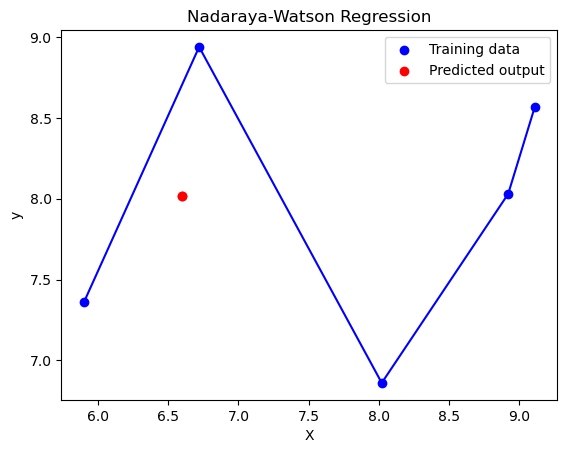

In [2]:
import numpy as np
from scipy.spatial.distance import cdist


#Define the kernel function:
def kernel_function(X, x, h):
    distances = cdist(X, x[np.newaxis]) / h
    return np.exp(-0.5 * distances**2)


#Implement the Nadaraya-Watson model:
def nadaraya_watson(X, y, x, h):
    kernels = kernel_function(X, x, h)
    weights = kernels / np.sum(kernels)
    return np.dot(weights.T, y)


#Define your training data and new input:
X = np.array([[5.90], [6.72], [8.02], [8.92], [9.11]])
y = np.array([7.36, 8.94, 6.86, 8.03, 8.57])
x_new = np.array([6.6])


#Call the nadaraya_watson function to make predictions:
predicted_output = nadaraya_watson(X, y, x_new, h=1)
print(predicted_output)


# Visualize the results:
plt.scatter(X, y, color='blue', label='Training data')
plt.scatter(x_new, predicted_output, color='red', label='Predicted output')
plt.plot(X, y, color='blue')
plt.plot(x_new, predicted_output, color='red', marker='o')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nadaraya-Watson Regression')
plt.legend()
plt.show()

Motivate the kernel regression model (3.61) from a different perspective, starting with kernel density estimation: Suppose we have a training set $\{x_{n}, t_{n}\}$ and we use a Parzen density estimator to model the joint distribution $p(x, t)$, so that
\begin{equation}
p(x,t)=\frac{1}{N}\sum_{n=1}^{N}f(x-x_{n},t-t_{n})
\end{equation}
where $f(x,t)$ is the component density function, and there is one such component centred on each data point.

An expression for the regression function $y(x)$:

\begin{equation}
y(x)=\mathbb{E}[t|x]=\int_{-\infty }^{\infty }tp(t|x)dt =\frac{\int tp(x,t)dt}{\int p(x,t)dt} =\frac{\sum _{n}\int tf(x-x_{n},t-t_{n})dt}{\sum_{m}\int f(x-x_{m},t-t_{m})dt}
\end{equation}

Assume for simplicity that the component density functions have zero mean so that
\begin{equation}
\int _{-\infty }^{\infty }f(x,t)tdt=0
\end{equation}
for all values of $x$. Using a simple change of variable, we then obtain (Nadaraya-Watson model or kernel regression)
\begin{equation}
y(x)=\frac{\sum_{n}g(x-x_{n})t_{n}}{\sum_{m}g(x-x_{m})}=\sum_{n}k(x,x_{n})t_{n}
\end{equation}
where $n,m = 1,...,N$ and the kernel function $k(x,x_{n})$ is given by
\begin{equation}
k(x,x_{n})=\frac{g(x-x_{n})}{\sum _{m}g(x-x_{m})}
\end{equation}
summation constraint: $\sum_{n=1}^{N}k(x,x_{n})=1$

and we have defined
\begin{equation}
g(x)=\int_{-\infty }^{\infty }f(x,t)dt
\end{equation}

In fact, this model defines not only a conditional expectation but also a full conditional distribution given by
\begin{equation}
p(t|x)=\frac{p(t,x)}{\int p(t,x)dt}=\frac{\sum_{n}f(x-x_{n},t-t_{n})}{\sum_{m}\int f(x-x_{m},t-t_{m})dt}
\end{equation}
from which other expectations can be evaluated.


Prediction: 0.017989172542074994


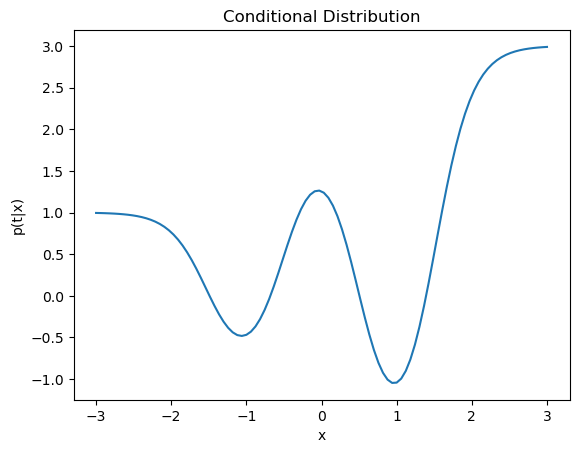

In [1]:
import numpy as np

def kernel_function(x, x_n, bandwidth):
    return np.exp(-(x - x_n)**2 / (2 * bandwidth**2))

def nadaraya_watson(x, x_data, t_data, bandwidth):
    numerator = np.sum(kernel_function(x, x_data, bandwidth) * t_data)
    denominator = np.sum(kernel_function(x, x_data, bandwidth))
    return numerator / denominator

def conditional_distribution(x, x_data, t_data, bandwidth):
    numerator = np.sum(kernel_function(x.reshape(-1, 1), x_data, bandwidth) * t_data, axis=1)
    denominator = np.sum(kernel_function(x.reshape(-1, 1), x_data, bandwidth), axis=1)
    return numerator / denominator

# 生成数据
x_data = np.array([-2, -1, 0, 1, 2])
t_data = np.array([1, -1, 2, -2, 3])

# 对新数据点进行预测
x_new = 0.5
bandwidth = 0.5
prediction = nadaraya_watson(x_new, x_data, t_data, bandwidth)
print("Prediction:", prediction)

# 计算条件分布
x_range = np.linspace(-3, 3, 100)
pdf = conditional_distribution(x_range, x_data, t_data, bandwidth)

# 可视化结果
import matplotlib.pyplot as plt
plt.plot(x_range, pdf)
plt.xlabel("x")
plt.ylabel("p(t|x)")
plt.title("Conditional Distribution")
plt.show()

## Citation
[1] http://t.csdn.cn/B5gxE

[2] http://t.csdn.cn/46TGB

[3] http://t.csdn.cn/sm1PW

[4] http://t.csdn.cn/cCyxk

[5] https://blog.csdn.net/wuwuwuwuwuwuwuwu/article/details/8252056?fromshare=blogdetail

[6] https://www.zhihu.com/tardis/bd/ans/235672121

[7] http://t.csdn.cn/XUiVE

[8] http://t.csdn.cn/sxKdf

[9] http://t.csdn.cn/wZZPH 

[10] http://t.csdn.cn/TxtwN

[11] http://t.csdn.cn/wwcmq

[12] http://t.csdn.cn/xhzNt